
## Identifying Appliances from Energy Use Patterns with Deep Learning 
##  A Microsoft machine learning challenge (January 2019)



This project is organized into following parts:

- Introduction
- Importing Libaries
- Loading Images
- Create training data
- Preprocessing Training Data
- Data Normalization and Spriting
- Building the Model (MLP Model)
- Evaluating the MLP Model
- Building the Model (CNN Model)
- Evaluating the CNN Model
- Saving the built Model
- Loading and Predicting with the new Built Model 
- Making Prediction on Testing Data
- Conclusion

# **Introduction**


The project's goal is to build a deep learning model to predict the types of appliances from spectrograms of current and voltage measurements. A spectrogram is a visual representation of the various frequencies of sound as they vary with time. These spectrograms were generated from current and voltage measurements sampled at 30 kHz from 11 different appliance types present in more than 60 households in Pittsburgh, Pennsylvania, USA. Data collection took place during the summer of 2013, and winter of 2014. Each appliance type is represented by dozens of different instances of varying make/models.
The data directory for this project includes the following folders and files :

The train folder contains training images with known labels , labels for these images are given in train_labels.csv. Another folder of images is labeled test, we don't know the true labels for these.

1. train (folder)

    1000_c.png
    
    1000_v.png
    
    1001_c.png
    
    1001_v.png
    
    ...
    
    1987_c.png
    
    1987_v.png
       

2. test (folder)

    1988_c.png
    
    1988_v.png
    
    1989_c.png
    
    1989_v.png
    
    ...
    
    2646_c.png
    
    2646_v.png
     

3. train_labels.csv (file)



4. submission_format.csv (file)



Our job is to:

   1. Train a model using images in train and labels in train_labels.csv
   2. Predict appliance labels for the images in test for which we don't know the true appliances.
   3. Output the predictions in a format that matches submission_format.csv exactly.
   4. Upload the predictions to the competition website in order to get an accuracy score.
   5. Export the token and paste it into the assignment grader on edX to get your course grade.

For each observation, we are given a spectrogram of current and a spectrogram of voltage. The files are therefore named with the conventions {id}_c.png and {id}_v.png, where _c corresponds to current and _v corresponds to voltage. The {id} in the filename matches the id column in train_labels.csv for the training data and in submission_format.csv for the test data.
Target Variable

The appliance labels correspond to the following appliances:

    0: Compact Fluorescent Lamp
    1: Hairdryer
    2: Microwave
    3: Air Conditioner
    4: Fridge
    5: Laptop
    6: Vacuum
    7: Incandescent Light Bulb
    8: Fan
    9: Washing Machine
    10:Heater





# **Importing Libraries**

In [1]:

#Let us start with importing the needed Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

%matplotlib inline


# **Loading Images**

In [2]:
#defining images loading function
def loadImages(path):
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.png')]

In [3]:
#loading images
path0='C:/Users/Celine/Desktop/Daddy/DeepLearning/data-release/train'
filenames=loadImages(path0)

imagesC,imagesV=[],[]
for file in filenames:
    if '_c' in file:
        imagesC.append(cv2.imread(file,0))
    elif '_v' in file:
        imagesV.append(cv2.imread(file,0))

        
        
# saving images into two separete folders(one for current and other one for voltage images respectively)  
num1=1000
for image in imagesC: 
        cv2.imwrite('trainC/'+ str(num1) + '.png',image)
        num1+=1
        
num2=1000
for image in imagesV: 
        cv2.imwrite('trainV/'+ str(num2) + '.png',image)
        num2+=1


# **Create training data**

In [4]:
#Specifying the path to the labels (In this project i will work only with current spectrogram images   )
DATADIR = "trainC"
Lebels =  pd.read_csv("C:/Users/Celine/Desktop/Daddy/DeepLearning/data-release/train_labels.csv")
training_Lebels=[]
training_Lebels=np.array(Lebels['appliance'])



In [5]:
#combining images and labels into one training-data folder
images = []
training_data=[]
IMG_SIZE=30 # Setting image size
path1 = DATADIR
class_num = training_Lebels
filenames=loadImages(path1)

def create_training_data():

    for file in sorted(filenames):
        try:
            img_array = cv2.imread(file,0)  # convert to array
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            images.append(new_array)  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))
           
    #for i,j in zip(images,class_num):
        #training_data.append((i,j))
  
    for i in range(0,len(images)):
        training_data.append((images[i],class_num[i]))
        
create_training_data()
print(len(training_data))

     

988


In [6]:


#Checking on the training data
#print(images[0])
print(len(images)) 
print(len(class_num))
print(np.array(training_data).shape)



988
988
(988, 2)


In [7]:

import random
random.shuffle(training_data)# shuffling data

for sample in training_data[:2]:# checking on shuffle result  ...sample[[feature],label]
    print(sample[0]) 
    print(sample[1]) 

[[ 58  57  56  56  59  60  56  59  61  60  56  59  58  56  59  59  54  57
   60  57  60  59  57  59  61  58  57  60  57  58]
 [ 54  57  59  59  57  57  61  60  53  56  57  61  56  55  55  58  55  61
   60  51  56  60  57  56  57  55  57  59  59  56]
 [ 57  62  55  55  59  58  58  61  56  60  52  55  55  58  57  56  56  61
   58  55  53  60  55  57  59  55  59  59  61  57]
 [ 59  58  60  59  58  62  57  60  59  64  60  55  59  58  56  58  63  55
   59  59  58  57  62  54  60  62  57  59  57  62]
 [ 59  59  61  55  60  60  59  65  60  65  58  62  64  61  64  60  63  61
   60  60  63  64  58  61  56  58  53  65  57  61]
 [ 61  60  62  52  66  61  60  59  61  57  57  66  62  62  57  62  57  66
   62  61  59  59  58  63  65  60  58  65  67  59]
 [ 63  61  60  62  61  59  60  56  54  63  61  60  67  63  63  61  61  62
   65  65  65  56  59  59  63  61  59  58  55  61]
 [ 62  62  62  62  61  60  62  51  64  59  59  56  62  65  64  61  62  59
   63  59  58  63  62  65  61  58  57  61  56  61]


# **Preprocessing training Data**

In [8]:


#Reshaping the training data
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))# resharp just one element(X[0])

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)# resharp all of elements of X

[[[[ 58]
   [ 57]
   [ 56]
   [ 56]
   [ 59]
   [ 60]
   [ 56]
   [ 59]
   [ 61]
   [ 60]
   [ 56]
   [ 59]
   [ 58]
   [ 56]
   [ 59]
   [ 59]
   [ 54]
   [ 57]
   [ 60]
   [ 57]
   [ 60]
   [ 59]
   [ 57]
   [ 59]
   [ 61]
   [ 58]
   [ 57]
   [ 60]
   [ 57]
   [ 58]]

  [[ 54]
   [ 57]
   [ 59]
   [ 59]
   [ 57]
   [ 57]
   [ 61]
   [ 60]
   [ 53]
   [ 56]
   [ 57]
   [ 61]
   [ 56]
   [ 55]
   [ 55]
   [ 58]
   [ 55]
   [ 61]
   [ 60]
   [ 51]
   [ 56]
   [ 60]
   [ 57]
   [ 56]
   [ 57]
   [ 55]
   [ 57]
   [ 59]
   [ 59]
   [ 56]]

  [[ 57]
   [ 62]
   [ 55]
   [ 55]
   [ 59]
   [ 58]
   [ 58]
   [ 61]
   [ 56]
   [ 60]
   [ 52]
   [ 55]
   [ 55]
   [ 58]
   [ 57]
   [ 56]
   [ 56]
   [ 61]
   [ 58]
   [ 55]
   [ 53]
   [ 60]
   [ 55]
   [ 57]
   [ 59]
   [ 55]
   [ 59]
   [ 59]
   [ 61]
   [ 57]]

  [[ 59]
   [ 58]
   [ 60]
   [ 59]
   [ 58]
   [ 62]
   [ 57]
   [ 60]
   [ 59]
   [ 64]
   [ 60]
   [ 55]
   [ 59]
   [ 58]
   [ 56]
   [ 58]
   [ 63]
   [ 55]
   [ 59]
   [ 59]
   [

In [9]:
#Let's save this data, so that we don't need to keep calculating it every time we want to use them:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

#We can always load it in to our current script, or a totally new one by doing:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)


# **Data Normalization and Spriting**

In [10]:
X = np.array(X/255.0)#Normalizing data, (scare data between 0-1)
y = np.array(y)

#Spliting out our data into traing and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# **Building the Model (MLP Model)**

In [11]:
#MULTIPLE LAYER PERCEPTRON (MLP)
#Importing tensorflow tools
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import datasets, layers, models
#from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras.callbacks import TensorBoard
#'''

#x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
#x_test =tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1
#print(x_train)

model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(11, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution****************************************************

model.compile(optimizer='adam',  # Good default optimizer to start with(adam,sgd)
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

history = model.fit(x_train, y_train, epochs=50, validation_split=0.3)  # train the model

val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

Instructions for updating:
Colocations handled automatically by placer.
Train on 483 samples, validate on 208 samples
Epoch 1/50
483/483 [==============================] - 3s 7ms/sample - loss: 2.2950 - acc: 0.1470 - val_loss: 2.2294 - val_acc: 0.2644
Epoch 2/50
483/483 [==============================] - 0s 518us/sample - loss: 2.1169 - acc: 0.2961 - val_loss: 2.0088 - val_acc: 0.3606
Epoch 3/50
483/483 [==============================] - 0s 679us/sample - loss: 1.8837 - acc: 0.4058 - val_loss: 1.8791 - val_acc: 0.4183
Epoch 4/50
483/483 [==============================] - 0s 582us/sample - loss: 1.6710 - acc: 0.4348 - val_loss: 1.7206 - val_acc: 0.4808
Epoch 5/50
483/483 [==============================] - 0s 582us/sample - loss: 1.5165 - acc: 0.5631 - val_loss: 1.6142 - val_acc: 0.4904
Epoch 6/50
483/483 [==============================] - 0s 550us/sample - loss: 1.4543 - acc: 0.5280 - val_loss: 1.5122 - val_acc: 0.5481
Epoch 7/50
483/483 [==============================] - 0s 582us/sampl

# **Evaluating the MPL model**

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


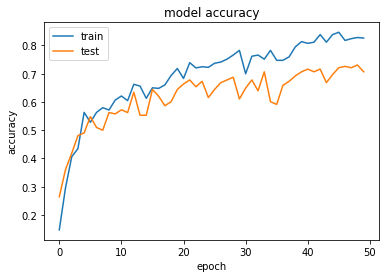

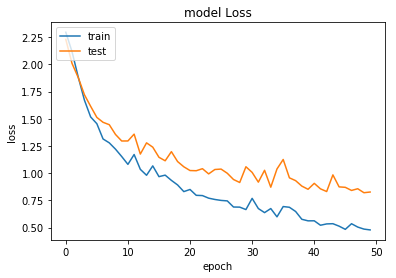

In [12]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Building the Model (CNN)**

In [13]:
#Importing tensorflow tools
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import datasets, layers, models
#from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras.callbacks import TensorBoard
#'''

In [14]:
#Loading in our saved data
import pickle 

pickle_in = open("X.pickle","rb")
X1 = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y1 = pickle.load(pickle_in)


X1 = np.array(X1/255.0)#Normalizing data, (scare data between 0-1)
y1 = np.array(y1)

#Importing  tools to split out our data into traing and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30, random_state=101)

In [15]:


#CONVOLUTION NEURAL NETWORK (CNN)
#https://www.tensorflow.org/alpha/tutorials/images/intro_to_cnns (one of my used tutorials)

model = models.Sequential()


model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))


model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.summary()


model.add(layers.Flatten()) # this converts our 3D feature maps to 1D feature vectors
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(11, activation='softmax'))#sigmoid ********************************************************************************************************************************************
#model.summary()


model.compile(optimizer='adam',#adam, sgd
              loss='sparse_categorical_crossentropy',#kullback_leibler_divergence,sparse_categorical_crossentropy,binary_crossentropy,sparse_softmax_cross_entropy
              metrics=['accuracy'])


history=model.fit(x_train, y_train, epochs=50, validation_split=0.3,callbacks=[tensorboard])


val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

Train on 483 samples, validate on 208 samples
Epoch 1/50
483/483 [==============================] - 13s 27ms/sample - loss: 2.3160 - acc: 0.0932 - val_loss: 2.2347 - val_acc: 0.1875
Epoch 2/50
483/483 [==============================] - 10s 22ms/sample - loss: 2.2186 - acc: 0.1387 - val_loss: 2.1186 - val_acc: 0.1683
Epoch 3/50
483/483 [==============================] - 10s 21ms/sample - loss: 2.0683 - acc: 0.2588 - val_loss: 1.9703 - val_acc: 0.2788
Epoch 4/50
483/483 [==============================] - 10s 21ms/sample - loss: 1.9455 - acc: 0.2940 - val_loss: 1.9616 - val_acc: 0.3413
Epoch 5/50
483/483 [==============================] - 10s 21ms/sample - loss: 1.8256 - acc: 0.3830 - val_loss: 1.9476 - val_acc: 0.3365
Epoch 6/50
483/483 [==============================] - 10s 21ms/sample - loss: 1.6675 - acc: 0.4410 - val_loss: 1.6644 - val_acc: 0.4087
Epoch 7/50
483/483 [==============================] - 10s 21ms/sample - loss: 1.4461 - acc: 0.5611 - val_loss: 1.5193 - val_acc: 0.4760
Ep

# **Evaluating the CNN Model**

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


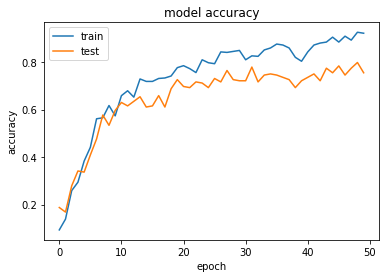

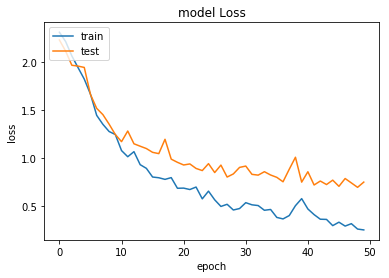

In [16]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Saving the built Model

In [17]:
model.save('CNN.model')


# Predicting with the new Built **Model**

4


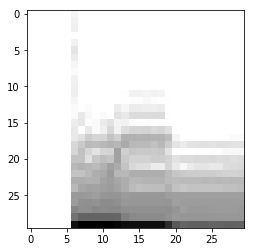

0


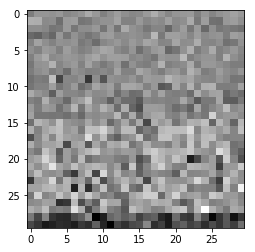

2


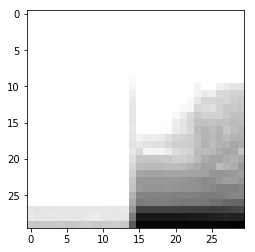

3


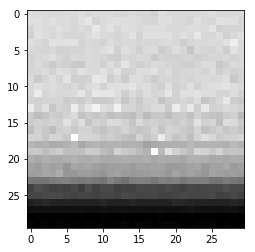

10


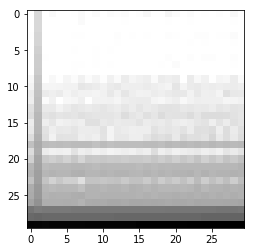

3


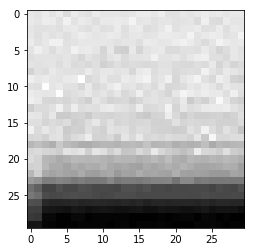

5


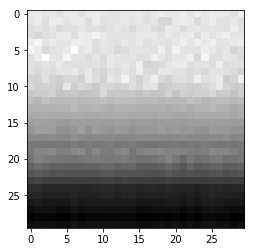

10


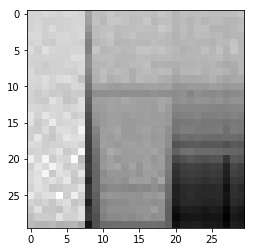

0


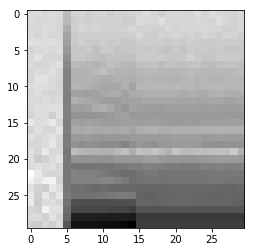

1


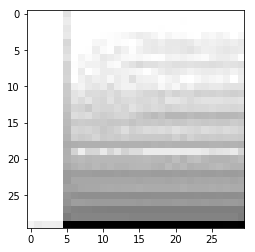

5


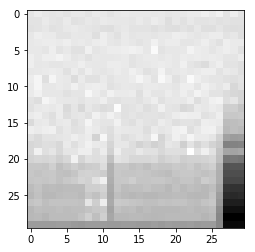

9


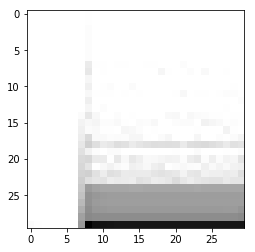

0


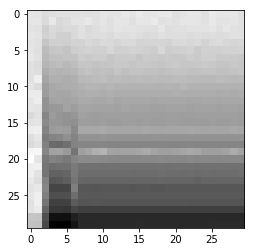

3


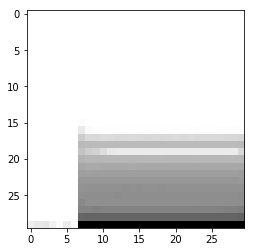

1


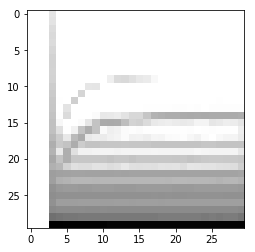

In [18]:

for i in range(15):

            model = tf.keras.models.load_model("CNN.model")
            prediction_prob = model.predict(x_test[i].reshape(1,30, 30, 1))
            label= np.argmax(prediction_prob)
            print(label)  # will be a list in a list.

            import matplotlib.pyplot as plt
            plt.imshow(x_test[i].reshape(30, 30),cmap=plt.cm.binary)
            plt.show()
      


## Making Prediction on  Testing Data

In [19]:
#defining images loading function
def loadImages(path):
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.png')]



#loading images
path2='C:/Users/Celine/Desktop/Daddy/DeepLearning/data-release/test'
filenames=loadImages(path2)

testimagesC,testimagesV=[],[]
for file in filenames:
    if '_c' in file:
        testimagesC.append(cv2.imread(file,0))
    elif '_v' in file:
        testimagesV.append(cv2.imread(file,0))
        


#saving images into two separete folders  
num1=1000
for image in testimagesC: 
        cv2.imwrite('testC/'+ str(num1) + '.png',image)
        num1+=1
        
num2=1000
for image in testimagesV: 
        cv2.imwrite('testV/'+ str(num2) + '.png',image)
        num2+=1


A subdirectory or file testC already exists.
A subdirectory or file testV already exists.


In [20]:
#Specifying the path where the testing images are saved
DATADIRtest = "testC"

In [21]:
#combining images and labels into one training-data folder
testimages = []
testID=[]
IMG_SIZE=30 # Setting image size
path3 = DATADIRtest
testfilenames=loadImages(path3)

def create_testing_data():

    for file in sorted(testfilenames):
        try:
            
            img_array = cv2.imread(file,0)  # convert to array
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            testimages.append(new_array)  # add this to our training_data
            
            testID.append(file[-8:-4])
            
        except Exception as e:  # in the interest in keeping the output clean...
            pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))
            
create_testing_data()


In [22]:
#Reshaping the data to fit the tensorflow model required formart
print(testimages[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))# resharp just one element(X[0])
Xtest = np.array(testimages).reshape(-1, IMG_SIZE, IMG_SIZE, 1)# resharp all of elements of X

[[[[ 80]
   [ 76]
   [ 77]
   [ 82]
   [ 80]
   [ 78]
   [ 80]
   [ 77]
   [ 79]
   [ 76]
   [ 79]
   [ 76]
   [ 78]
   [ 77]
   [ 80]
   [ 77]
   [ 77]
   [ 80]
   [ 78]
   [ 81]
   [ 77]
   [ 78]
   [ 75]
   [ 77]
   [ 77]
   [ 77]
   [ 76]
   [ 76]
   [ 78]
   [ 80]]

  [[ 80]
   [ 82]
   [ 79]
   [ 81]
   [ 77]
   [ 80]
   [ 79]
   [ 80]
   [ 80]
   [ 78]
   [ 77]
   [ 80]
   [ 80]
   [ 80]
   [ 77]
   [ 78]
   [ 76]
   [ 79]
   [ 78]
   [ 77]
   [ 79]
   [ 80]
   [ 79]
   [ 74]
   [ 79]
   [ 77]
   [ 79]
   [ 77]
   [ 79]
   [ 79]]

  [[ 77]
   [ 77]
   [ 81]
   [ 84]
   [ 82]
   [ 77]
   [ 80]
   [ 81]
   [ 77]
   [ 81]
   [ 78]
   [ 80]
   [ 80]
   [ 79]
   [ 79]
   [ 81]
   [ 75]
   [ 84]
   [ 80]
   [ 79]
   [ 82]
   [ 80]
   [ 81]
   [ 78]
   [ 82]
   [ 78]
   [ 80]
   [ 80]
   [ 80]
   [ 80]]

  [[ 79]
   [ 77]
   [ 77]
   [ 84]
   [ 78]
   [ 75]
   [ 81]
   [ 80]
   [ 78]
   [ 80]
   [ 79]
   [ 79]
   [ 81]
   [ 79]
   [ 79]
   [ 77]
   [ 78]
   [ 78]
   [ 77]
   [ 78]
   [

In [23]:
#Let's save this data, so that we don't need to keep calculating it every time we want to use them:
import pickle

pickle_out = open("Xtest.pickle","wb")
pickle.dump(Xtest, pickle_out)
pickle_out.close()


#We can always load it in to our current script, or a totally new one by doing:
pickle_in = open("Xtest.pickle","rb")
Xtest = pickle.load(pickle_in)

Xtest = np.array(Xtest/255.0)#Normalizing data,


In [24]:
import tensorflow as tf

labeltext=[]
model = tf.keras.models.load_model("CNN.model")

for i in range(len(Xtest)):       
        prediction_prob = model.predict(Xtest[i].reshape(1,30, 30, 1))
        label= np.argmax(prediction_prob)
        #print(label)  # will be a list in a list.
        labeltext.append(label)
        
        
submission=pd.DataFrame({'ID':testID, 'label':labeltext})# forming  data frame of both id and labels
submission.sort_values(by='ID', ascending=False)
submission.to_csv('submission_format',index=False)


df1=pd.read_csv('submission_format')
print(df1)


       ID  label
0    1000      8
1    1001      1
2    1002      2
3    1003      8
4    1004      2
5    1005      5
6    1006      3
7    1007      3
8    1008      2
9    1009      0
10   1010      8
11   1011      5
12   1012      8
13   1013      2
14   1014      1
15   1015      4
16   1016      5
17   1017      2
18   1018      5
19   1019      7
20   1020      1
21   1021      8
22   1022      3
23   1023      3
24   1024      3
25   1025      0
26   1026      7
27   1027      1
28   1028      0
29   1029      7
..    ...    ...
629  1629      8
630  1630      3
631  1631      6
632  1632      2
633  1633      1
634  1634      3
635  1635      0
636  1636      7
637  1637      5
638  1638      8
639  1639      1
640  1640      9
641  1641      2
642  1642      9
643  1643      8
644  1644      3
645  1645      1
646  1646      0
647  1647      2
648  1648      0
649  1649      2
650  1650      8
651  1651      3
652  1652      5
653  1653      8
654  1654      3
655  1655     

## Conclusion




In this project, two Deep Learning models including; MLP and CNN were built and compared on how both predict the types of appliances from spectrograms of current measurements (Images). The models perfomences on training dataset were 72% for MLP and 77% for CNN.The new CNN model then deployed to new unseen dataset (test dataset) and the accuracy was 86%.